<a href="https://colab.research.google.com/github/Panperception/TutorialDL/blob/main/Lab_Week13_01_DAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoder with only one hidden layer


We construct a 3 layer architecture, using the middle layer as an encoded latent space. Then the training is carried out over the cost function,

$$
 \mathcal{L} (\hat{x} - x)
$$

Where, $\mathbf{\hat{x}}$ is the reconstructed data(images).

In [1]:
# Upload dataset
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [2]:
# Claim models
import keras
import matplotlib.pyplot as plt

# The input size/image
input_img = keras.Input(shape=(784,))
# The size of latent space
encoding_dim = 32
## Add a simple encode layer
# encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# You can add encode layer with a L1 activity regularizer
encoded = keras.layers.Dense(encoding_dim, activation='relu', 
                activity_regularizer=keras.regularizers.l1(10e-5))(input_img)
# Add decode layer
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# Claim autoencoder model
model_autoencoder = keras.Model(input_img, decoded)

# Claim a separate encoder model
model_encoder = keras.Model(input_img, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_autoencoder.layers[-1]
# Create the decoder model
model_decoder = keras.Model(decoder_input, decoder_layer(decoder_input))


Epoch 1/10
235/235 [==============================] - 7s 23ms/step - loss: 0.2851 - val_loss: 0.2010
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1797 - val_loss: 0.1612
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1525 - val_loss: 0.1422
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1377 - val_loss: 0.1308
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1283 - val_loss: 0.1233
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1218 - val_loss: 0.1177
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1168 - val_loss: 0.1135
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1132 - val_loss: 0.1104
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1106 - val_loss: 0.1083
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1088 - val_lo

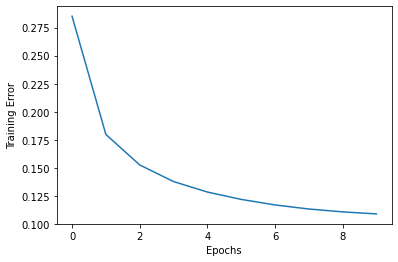

In [3]:
# Training
# Claim compile property for training
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
hist=model_autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

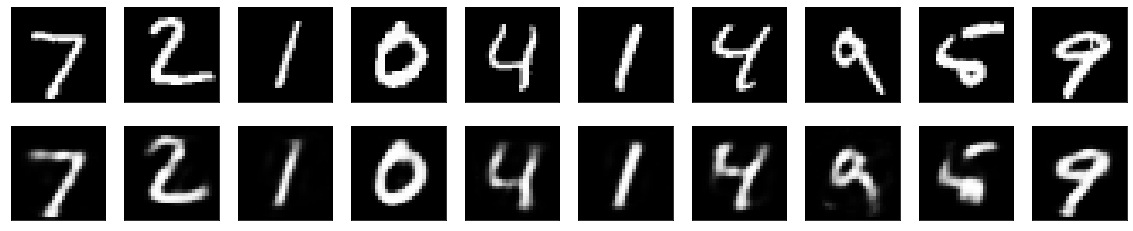

In [4]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = model_encoder.predict(x_test)
decoded_imgs = model_decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Deep autoencoder
We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [5]:
import keras
import matplotlib.pyplot as plt

# define a 3+3 deep autoencoder
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(128, activation='relu')(input_img)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

model_DAE = keras.Model(input_img, decoded)

# Claim a separate decoder model
model_DAE_encoder = keras.Model(input_img, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoded.shape[1],))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_DAE.layers[-3](decoder_input)
decoder_layer = model_DAE.layers[-2](decoder_layer)
decoder_layer = model_DAE.layers[-1](decoder_layer)
# Create the decoder model
model_DAE_decoder = keras.Model(decoder_input, decoder_layer)



Epoch 1/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2451 - val_loss: 0.1695
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1531 - val_loss: 0.1397
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1343 - val_loss: 0.1282
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1247 - val_loss: 0.1193
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1179 - val_loss: 0.1141
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1142 - val_loss: 0.1110
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1112 - val_loss: 0.1082
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1086 - val_loss: 0.1065
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1063 - val_loss: 0.1043
Epoch 10/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1044 - val_lo

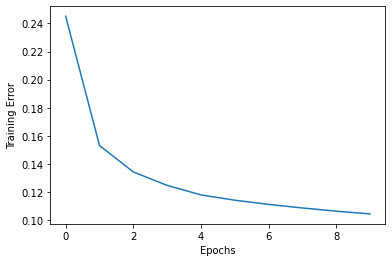

In [6]:
model_DAE.compile(optimizer='adam', loss='binary_crossentropy')

hist = model_DAE.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

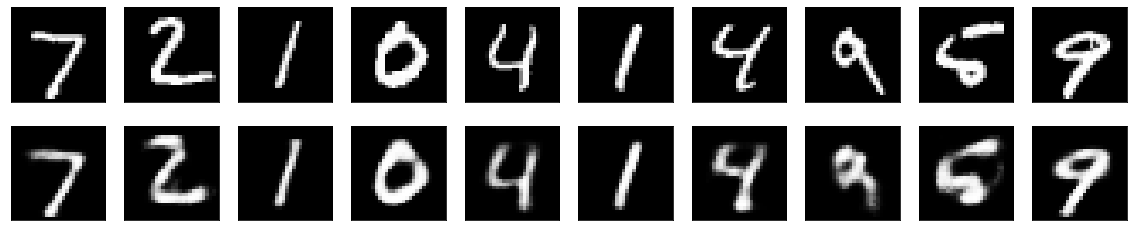

In [7]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = model_DAE_encoder.predict(x_test)
decoded_imgs = model_DAE_decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
